<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

In [ ]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
cdf

In [ ]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])

cdf

In [ ]:
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[8500:])
cdf

In [ ]:
cdf = cdf.sort_values(by='Full Bath', ascending=False)
cdf = cdf.drop(cdf.index[8497:])
cdf

In [ ]:
cdf['Full Bath'].unique()

In [21]:
cdf['Land_Use'] = cdf['Land Use']
cdf['Foundation_Type'] = cdf['Foundation Type']
cdf['Exterior_Wall'] = cdf['Exterior Wall']

cdf = cdf.drop(['Land Use', 'Foundation Type', 'Exterior Wall'], axis=1)
cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']
cdf = cdf[cdf.Land_Use != 'QUADPLEX']

cdf = cdf[cdf.Foundation_Type != 'PIERS']

cdf = cdf[cdf.Exterior_Wall != 'CONC BLK']
cdf = cdf[cdf.Exterior_Wall != 'LOG']
cdf = cdf[cdf.Exterior_Wall != 'METAL']

cdf = cdf[cdf.Bedrooms <= 6]

cdf

,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,...,Year Built,Bedrooms,Full Bath,Half Bath,Land_Use,Foundation_Type,Exterior_Wall,Avg_Price_By_Bedrooms,Avg_Value_By_Bedrooms,Sales_by_city_count
1140,4009 SHUFELD CT,ANTIOCH,2014-07-15,141433.0,4009 SHUFELD CT,ANTIOCH,TN,0.28,24000.0,104200.0,...,1981.0,4.0,6.0,0.0,DUPLEX,CRAWL,BRICK/FRAME,106464,122495,756
1216,137 COLEMONT DR,ANTIOCH,2013-09-27,105000.0,137 COLEMONT DR,ANTIOCH,TN,0.32,24000.0,104500.0,...,1981.0,4.0,6.0,0.0,DUPLEX,CRAWL,BRICK/FRAME,106464,122495,756
50369,1605 DOUGLAS AVE,NASHVILLE,2014-07-16,110000.0,1605 DOUGLAS AVE,NASHVILLE,TN,0.20,45000.0,48100.0,...,1928.0,5.0,4.0,0.0,TRIPLEX,CRAWL,STUCCO,104658,117163,4937
1484,124 ROBERT YOEST DR,ANTIOCH,2016-05-24,148000.0,124 ROBERT YOEST DR,ANTIOCH,TN,0.60,24000.0,101400.0,...,1970.0,6.0,4.0,0.0,DUPLEX,FULL BSMT,BRICK,110787,99624,756
1350,2791 PENNINGTON BEND RD,NASHVILLE,2013-12-18,135500.0,2791 PENNINGTON BEND RD,NASHVILLE,TN,0.41,30000.0,130700.0,...,2001.0,4.0,4.0,0.0,DUPLEX,FULL BSMT,BRICK,106464,122495,4937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17950,922 14TH AVE N,NASHVILLE,2016-04-08,100000.0,922 14TH AVE N,NASHVILLE,TN,0.16,9000.0,46600.0,...,1958.0,2.0,1.0,0.0,SINGLE FAMILY,CRAWL,FRAME,96626,93957,4937
22871,209 QUEEN AVE,NASHVILLE,2015-07-30,100000.0,209 QUEEN AVE,NASHVILLE,TN,0.21,10000.0,77000.0,...,1937.0,5.0,1.0,1.0,SINGLE FAMILY,PT BSMT,FRAME,104658,117163,4937
33559,3016 RICH ACRES DR,NASHVILLE,2014-02-28,99999.0,3016 RICH ACRES DR,NASHVILLE,TN,0.56,27600.0,80500.0,...,1959.0,3.0,1.0,1.0,SINGLE FAMILY,CRAWL,BRICK,109277,119155,4937
23924,213 DELVIN DR,ANTIOCH,2014-06-27,99900.0,213 DELVIN DR,ANTIOCH,TN,0.23,24000.0,67200.0,...,1972.0,3.0,1.0,1.0,SINGLE FAMILY,CRAWL,BRICK,109277,119155,756


In [22]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
# cdf.dtypes

In [ ]:
# 5 - Three aggregated coumns using groupby and transform
cdf['Avg_Price_By_Bedrooms'] = cdf.groupby('Bedrooms')['Sale Price'].transform('mean')
cdf['Avg_Price_By_Bedrooms'] = cdf['Avg_Price_By_Bedrooms'].astype(int)
cdf['Avg_Value_By_Bedrooms'] = cdf.groupby('Bedrooms')['Total Value'].transform('mean')
cdf['Avg_Value_By_Bedrooms'] = cdf['Avg_Value_By_Bedrooms'].astype(int)
cdf['Sales_by_city_count'] = cdf.groupby('Property City')['Land_Use'].transform('count')
cdf

In [ ]:

land_use_map = { 'SINGLE FAMILY': 1,
                 'DUPLEX': 2,
                 'TRIPLEX': 3 }

cdf = cdf.replace({'Land_Use' : land_use_map})
cdf

In [43]:
# 4 - label-encoded, numbers associated with the type of property
le = LabelEncoder()
y_data = le.fit_transform(cdf['Sale Price'])
cdf['Property_Address'] = le.fit_transform(cdf['Property Address'])
cdf['Property_City'] = le.fit_transform(cdf['Property City'])
cdf['Foundation'] = le.fit_transform(cdf['Foundation_Type'])
cdf['Exterior'] = le.fit_transform(cdf['Exterior_Wall'])
# cdf

# cdf['Property City'] = le.fit_transform(cdf['Property City'])

x_data = cdf.drop(columns=['Property Address', 'Property City', 'Sale Date', 'Address', 'City',
                           'TN', 'Foundation_Type', 'Exterior_Wall'])
x_data
# cdf
# Scaling
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)


# x_data_test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state=1)
x_test


array([[-1.53080435, -0.89696529, -0.2676929 , ...,  0.51763897,
        -0.52234437, -1.01873036],
       [ 0.15536961, -0.45805021, -0.56393388, ...,  0.99326758,
         0.5924186 ,  0.95446466],
       [-0.20372299, -0.69745844,  0.42353607, ...,  0.51763897,
        -0.52234437,  0.95446466],
       ...,
       [ 0.93600571,  0.9384978 , -0.36643989, ...,  0.51763897,
         0.5924186 , -1.01873036],
       [ 1.09213293,  1.37741289,  0.02854809, ...,  0.51763897,
         2.82194452, -1.01873036],
       [-1.09364814,  0.18037174,  0.12729508, ...,  0.51763897,
         2.82194452,  0.95446466]])

In [ ]:
#  pandas one hot encoding
temp = pd.get_dummies(cdf['Property City'])
temp

In [15]:
#  Used to get the couns for Avg Sale Price based on number of bedrooms

# one_bed_cdf = cdf[cdf.Bedrooms == 1]
# one_bed_cdf
# two_bed_cdf = cdf[cdf.Bedrooms == 2]
# two_bed_cdf
# three_bed_cdf = cdf[cdf.Bedrooms == 3]
# three_bed_cdf
# four_bed_cdf = cdf[cdf.Bedrooms == 4]
# four_bed_cdf
# five_bed_cdf = cdf[cdf.Bedrooms == 5]
# five_bed_cdf
# six_bed_cdf = cdf[cdf.Bedrooms == 6]
# six_bed_cdf

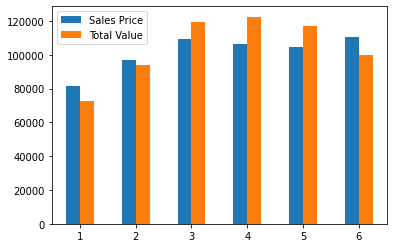

In [12]:
sales_price_avg = [81309, 96626, 109277, 106464, 104658, 110787]
 
total_value_avg = [72579, 93957, 119155, 122495, 117163, 99624]
 
index = ['1', '2', '3', '4', '5', '6']
 
tdf = pd.DataFrame({'Sales Price': sales_price_avg,
 
                   'Total Value': total_value_avg}, index=index)
 
ax = tdf.plot.bar(rot=0)

In [ ]:

sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col='Land Use', hue='Land Use')
# sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col = 'Property City', hue='Property City')

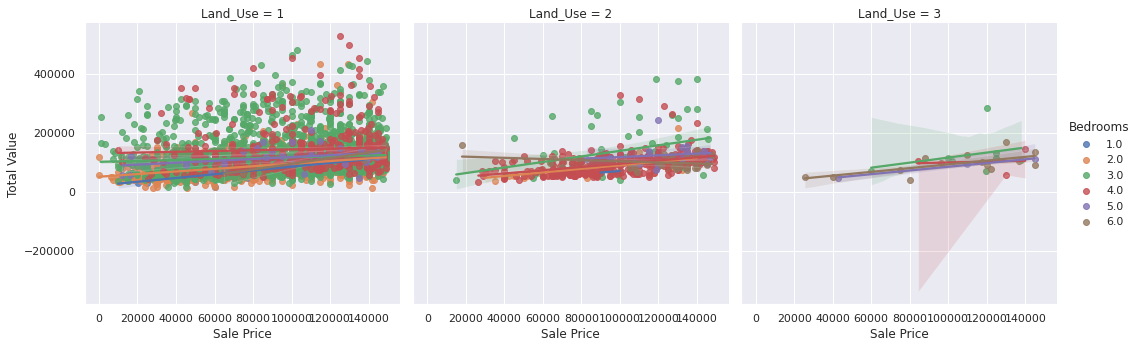

In [39]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', col='Land_Use',  hue='Bedrooms')

In [42]:

fig = px.scatter_3d(cdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Land Use', size='Bedrooms', size_max= 20, 
                    symbol='Land Use', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [13]:
tdf = cdf[cdf.Bedrooms >= 3]
tdf = tdf[tdf.Bedrooms < 6]

tdf = tdf[tdf.Exterior_Wall != 'STUCCO']
tdf = tdf[tdf.Exterior_Wall != 'STONE']
tdf = tdf[tdf.Exterior_Wall != 'FRAME/STONE']

fig = px.scatter_3d(tdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Exterior_Wall', size='Bedrooms', size_max= 10, 
                    symbol='Exterior_Wall', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

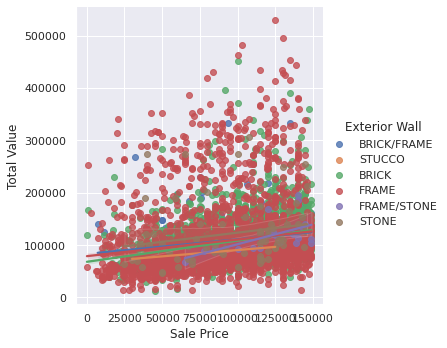

In [25]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', hue='Exterior Wall')

In [ ]:
plot = sns.pairplot(cdf, hue='Land_Use')
# plot = plot.map_upper(plt.scatter)
# plot = plot.map_lower(sns.kdeplot)